<a href="https://colab.research.google.com/github/akuian/AndroidBasic1-5/blob/master/quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 1

NIM: 2041720210
Nama: Hafiyyan Faza Pratama
Kelas: TI-3I

1. Make a housing price prediction. Choose the exact two variables that are suitable for regression.
output: regression chart (Single Linear Regression), r-squared value, and error rate

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('dataset(train).csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.shape

data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


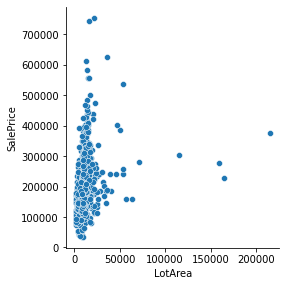

In [ ]:
#Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
sns.pairplot(data, x_vars=['LotArea'], 
             y_vars='SalePrice', size=4, aspect=1, kind='scatter')
plt.show()

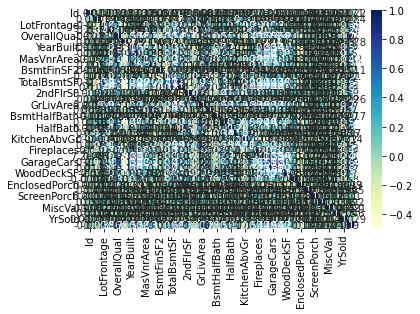

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
#Linear Regression
X = data['LotArea']
y = data['SalePrice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
X_train
y_train

210      98000
318     260000
239     113000
986     117000
1416    122500
         ...  
1009    102000
802     189000
53      385000
350     318061
79      110000
Name: SalePrice, Length: 1021, dtype: int64

In [ ]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const      160028.986729
LotArea         1.946678
dtype: float64

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     70.12
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.83e-16
Time:                        03:12:22   Log-Likelihood:                -12929.
No. Observations:                1021   AIC:                         2.586e+04
Df Residuals:                    1019   BIC:                         2.587e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.6e+05   3417.631     46.825      0.000    1.53e+05    1.67e+05
LotArea        1.9467      0.232      8.374      0.000       1.490       2.403
==============================================================================
Omnibus:                      445.018   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2920.168
Skew:                           1.882   Prob(JB):                         0.00
Kurtosis:                      10.381   Cond. No.                     2.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

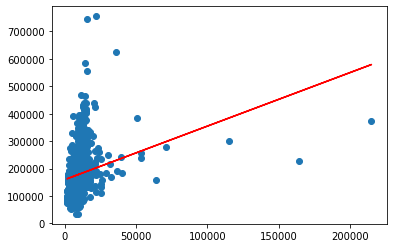

In [ ]:
# Linear Regression Visualization
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.6e+05 + 1.9467*X_train, 'r')
plt.show()

In [ ]:
#Value Prediction
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


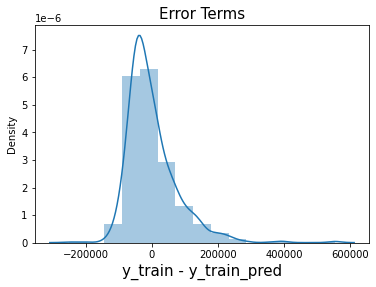

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

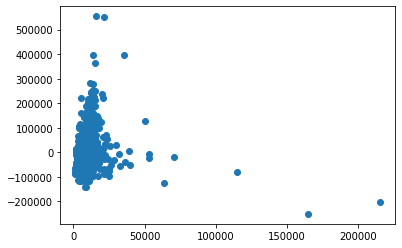

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = lr.predict(X_test_sm)

y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1436    177549.087532
57      182698.050490
780     175359.074931
382     178026.023609
1170    179262.164055
dtype: float64

In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.08024800685121403

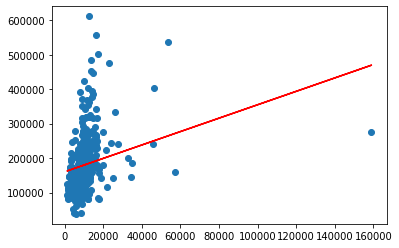

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

2. Find the accuracy between testing and training data!

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

X = np.absolute(X)

X = np.round(X, 2) * 100

X = X.astype(int)

In [ ]:
import pandas as pd

y_new = y.reshape(len(y), 1)

data = np.concatenate((X, y_new), axis=1)

columns = ['Fitur 1', 'Fitur 2', 'Label']

df = pd.DataFrame(data, columns=columns)

df.head()

,Fitur 1,Fitur 2,Label
0,217,72,0
1,137,155,0
2,14,150,0
3,139,94,0
4,78,136,0


In [ ]:
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

df_label = df.copy()

df_label['Label'] = df_label['Label'].map(labels)

df_label.head()

,Fitur 1,Fitur 2,Label
0,217,72,Kelas B
1,137,155,Kelas B
2,14,150,Kelas B
3,139,94,Kelas B
4,78,136,Kelas B


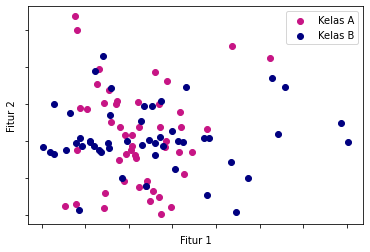

In [ ]:
import matplotlib.pyplot as plt

colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

mnb = MultinomialNB()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

mnb.fit(X_train, y_train)

y_train_pred = mnb.predict(X_train)

acc_train = accuracy_score(y_train, y_train_pred)

y_test_pred = mnb.predict(X_test)

acc_test = accuracy_score(y_test, y_test_pred)

print(f'Hasil akurasi data training: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data training: 0.5857142857142857
Hasil akurasi data test: 0.4666666666666667


3. Make a bar chart that represents the property's proportion in each zone.

In [ ]:
import pandas as pd
df = pd.DataFrame([x.split(' ') for x in data.split('\n')[1:]])
df.columns = data.split('\n')[0].split(' ')
df.Property = df.Property.map({'Yes': 1, 'No': 0})
df.zone = df.zone

AttributeError: ignored

4.  Make a pie chart to represent the property's kind proportion.

5. Based on your answer from point no. 1-4, write your insight in a paragraph! 

The answers of number 1, are used to predict the data by using linear regression,(Single Linear Regression, and then after that we detect the error by using residual analysis. For 2 we search the accuracy of training and test data,